In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmers-penguin-dataset-extended/palmerpenguins_original.csv
/kaggle/input/palmers-penguin-dataset-extended/palmerpenguins_extended.csv


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/kaggle/input/palmers-penguin-dataset-extended/palmerpenguins_extended.csv')

In [31]:
# Step 1: Initial Exploration
print("Initial dataset information:")
df.info()

Initial dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3430 non-null   object 
 1   island             3430 non-null   object 
 2   bill_length_mm     3430 non-null   float64
 3   bill_depth_mm      3430 non-null   float64
 4   flipper_length_mm  3430 non-null   float64
 5   body_mass_g        3430 non-null   float64
 6   sex                3430 non-null   object 
 7   diet               3430 non-null   object 
 8   life_stage         3430 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3430 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 294.9+ KB


In [32]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021


In [33]:
# Identify missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64


In [34]:
# Step 2: Data Cleaning
# Drop irrelevant columns
if "year" in df.columns:
    df = df.drop(columns=["year"])

In [35]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight


In [36]:
# Check for duplicates
df = df.drop_duplicates()

EDA (below)


In [37]:
# Step 3: Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
count     3430.000000    3430.000000        3430.000000   3430.000000
mean        38.529825      18.447143         207.028863   4834.710496
std         13.175171       2.774428          28.944765   1311.091310
min         13.600000       9.100000         140.000000   2477.000000
25%         28.900000      16.600000         185.000000   3843.500000
50%         34.500000      18.400000         203.000000   4633.500000
75%         46.600000      20.300000         226.000000   5622.000000
max         88.200000      27.900000         308.000000  10549.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

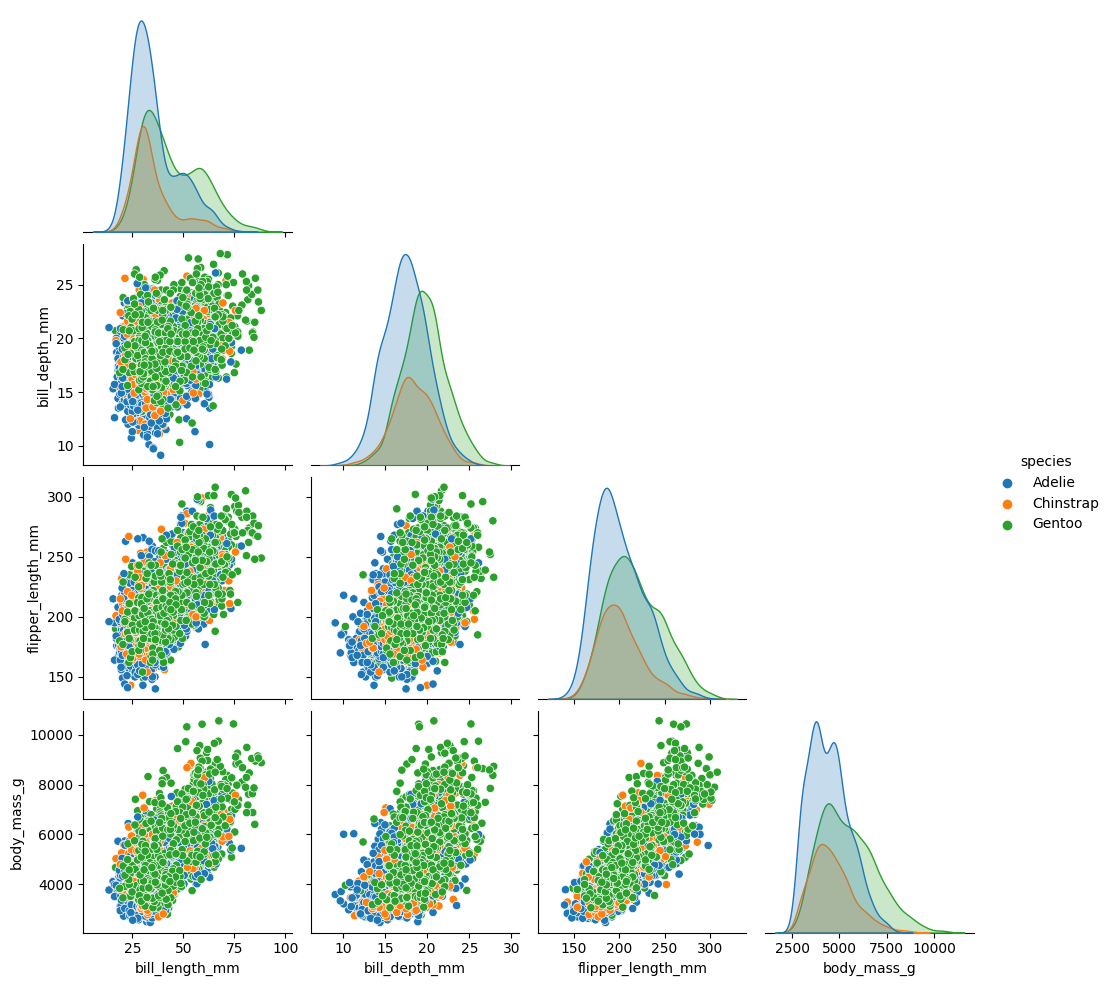

In [38]:
# Pairplot with corner=True
selected_columns = ['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
sns.pairplot(df[selected_columns], corner=True, hue='species')
plt.show()

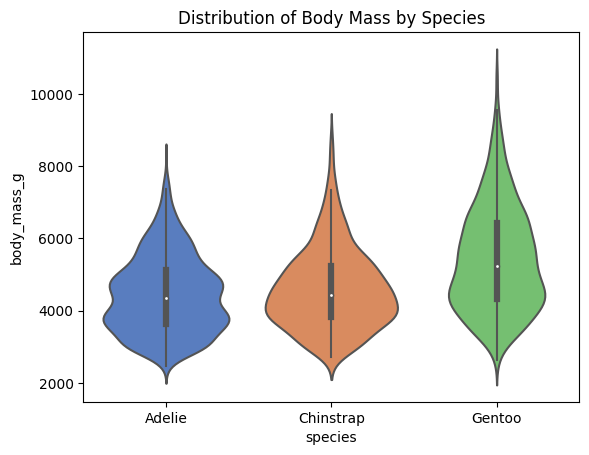

In [39]:
# Violin Plot for Species vs. Body Mass
sns.violinplot(x='species', y='body_mass_g', data=df, palette='muted')
plt.title('Distribution of Body Mass by Species')
plt.show()


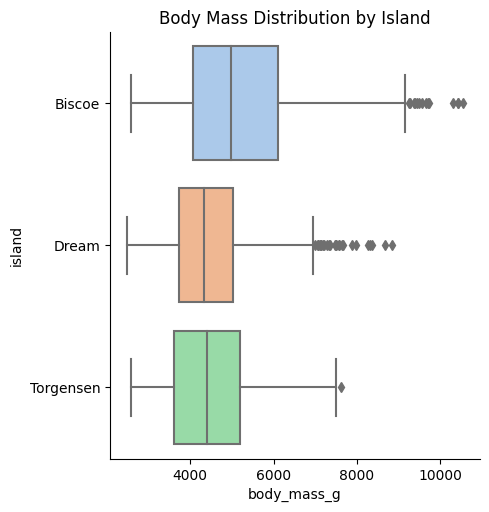

In [40]:
# Box Plot for Body Mass vs. Island
sns.catplot(data=df, x='body_mass_g', y='island', kind='box', palette='pastel')
plt.title('Body Mass Distribution by Island')
plt.show()



In [41]:
# Pivot Table: Mean values of numerical features by species
pivot_table_result = pd.pivot_table(df,
    values=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    index=['species'],
    aggfunc='mean')
print(pivot_table_result.round(2).T)

species             Adelie  Chinstrap   Gentoo
bill_depth_mm        17.46      18.42    19.69
bill_length_mm       35.43      35.01    44.16
body_mass_g        4445.48    4602.53  5437.64
flipper_length_mm   200.76     201.68   217.55


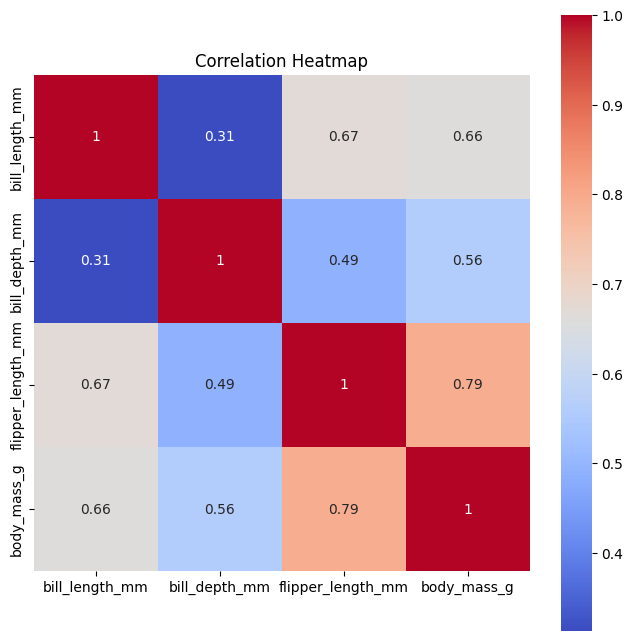

In [42]:
# Correlation heatmap (for numerical features)
numerical_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(8, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

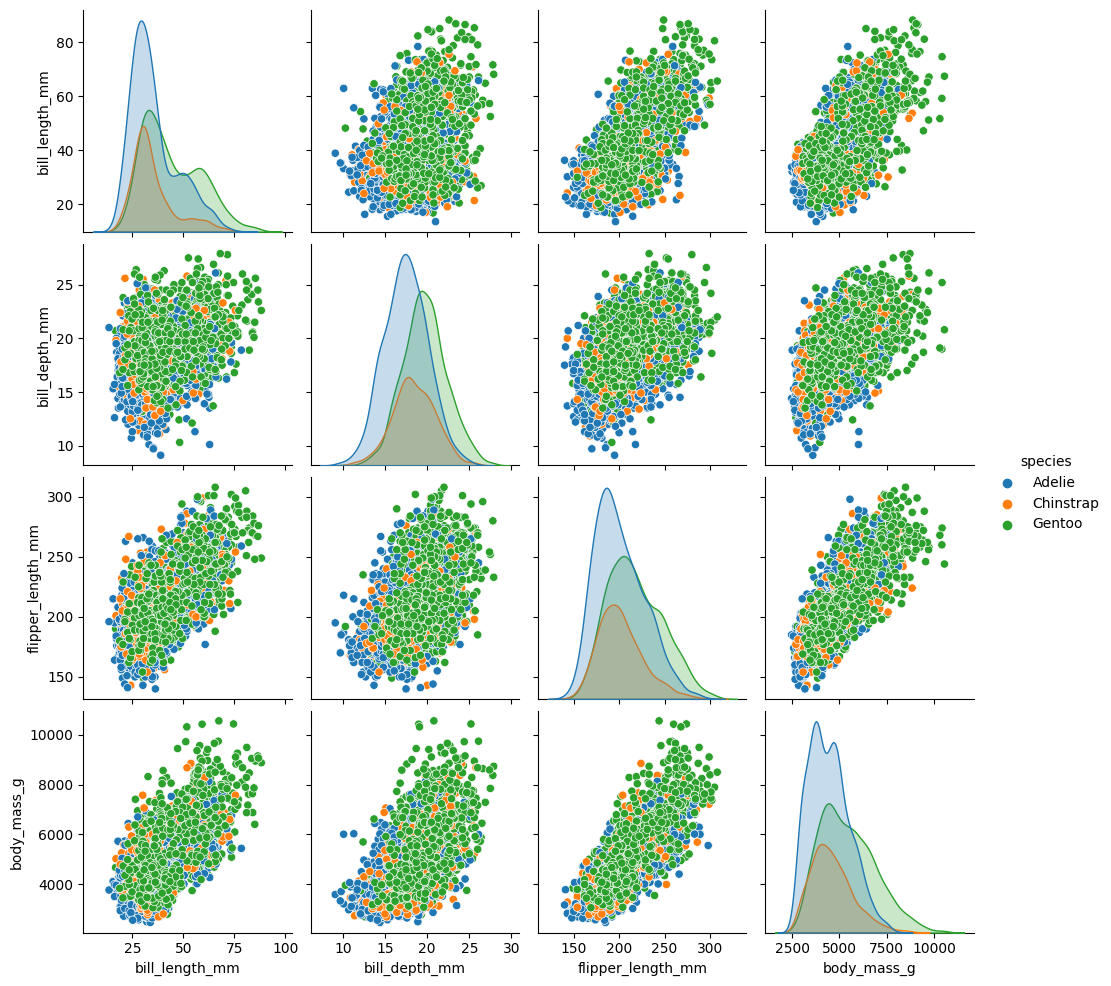

In [43]:
# Scatterplot of key features by species
sns.pairplot(df, hue="species", vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"], diag_kind="kde")
plt.show()

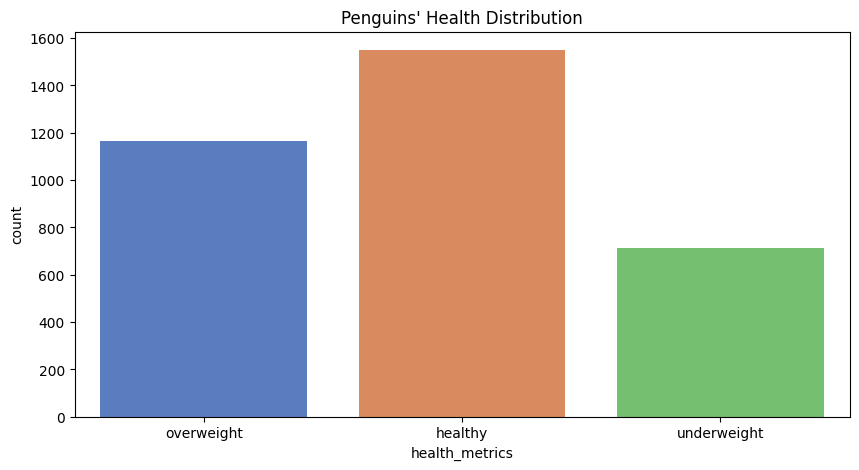

In [44]:
# New EDA Focusing on Health Metrics
# Countplot of Health Metrics
plt.figure(figsize=(10,5))
ax = sns.countplot(df, x='health_metrics', palette='muted')
ax.set_title("Penguins' Health Distribution")
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 1000x2000 with 0 Axes>

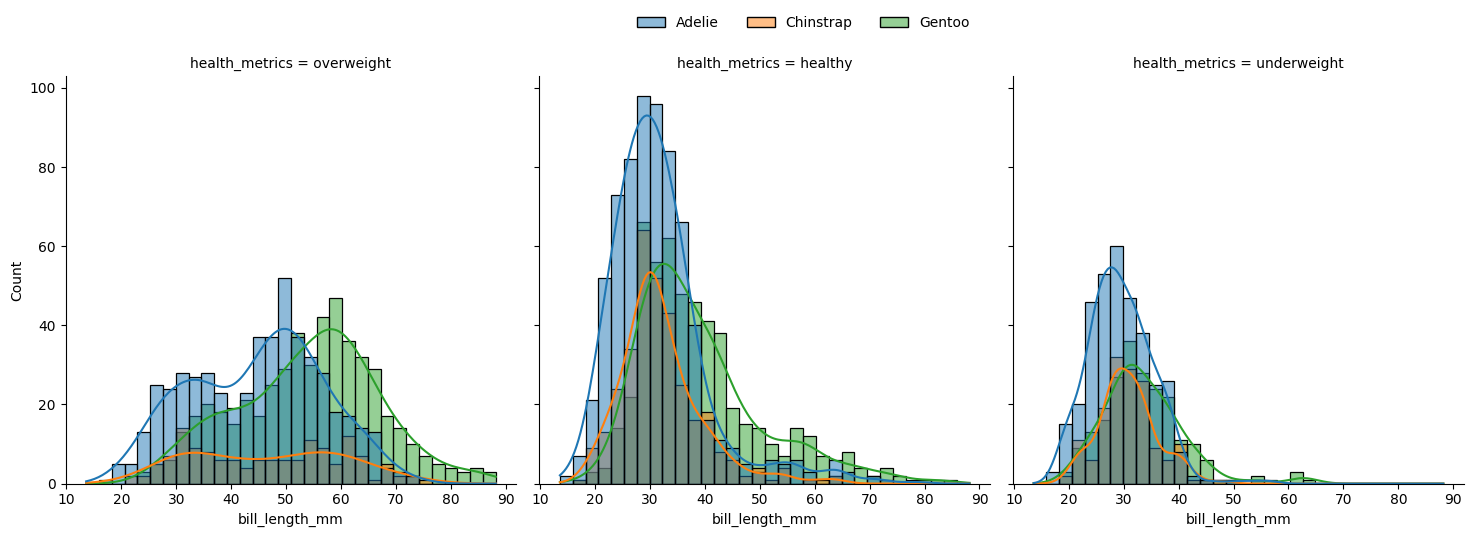

In [45]:
# Distribution of Bill Length by Health
plt.figure(figsize=(10,20))
ax = sns.displot(
    df,
    x="bill_length_mm", hue="species",
    col="health_metrics", col_wrap=3,
    kde=True,
)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

<Figure size 1000x2000 with 0 Axes>

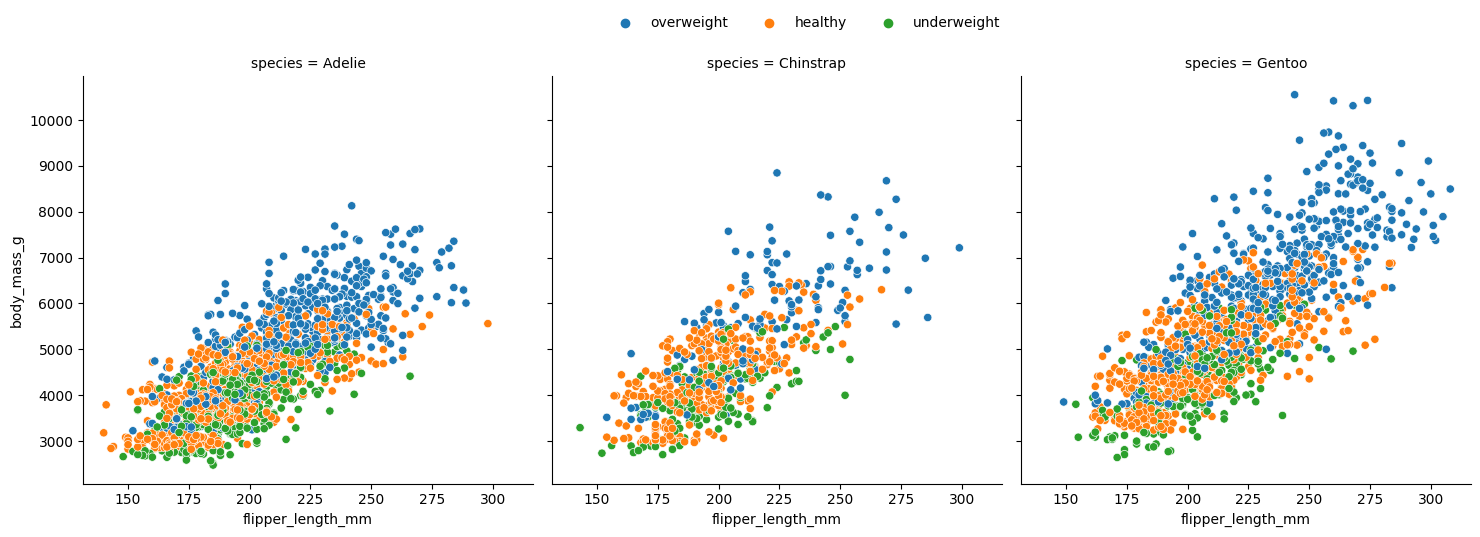

In [46]:
# Flipper Length & Body Mass by Health
plt.figure(figsize=(10, 20))
ax = sns.relplot(
    data=df, x="flipper_length_mm", y="body_mass_g",
    col="species", hue="health_metrics",
    kind="scatter"
)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns, excluding the target variable
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns = [col for col in categorical_columns if col != 'species']

label_encoders = {}

# Loop through categorical columns and apply encoding
for column in categorical_columns:
    if column in ['life_stage', 'health_metrics']:  # Ordinal columns
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    else:  # Nominal columns
        df = pd.get_dummies(df, columns=[column], drop_first=False)  # One-Hot Encoding
        df[[col for col in df.columns if col.startswith(column + "_")]] = df[
            [col for col in df.columns if col.startswith(column + "_")]
        ].astype(int)  # Convert boolean to int (0,1)

# Encode the target variable 'species' using Label Encoding
target_le = LabelEncoder()
df['species'] = target_le.fit_transform(df['species'])

# Display the updated DataFrame
print(df.head())

   species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0        0            53.4           17.8              219.0       5687.0   
1        0            49.3           18.1              245.0       6811.0   
2        0            55.7           16.6              226.0       5388.0   
3        0            38.0           15.6              221.0       6262.0   
4        0            60.7           17.9              177.0       4811.0   

   life_stage  health_metrics  island_Biscoe  island_Dream  island_Torgensen  \
0           0               1              1             0                 0   
1           0               1              1             0                 0   
2           0               1              1             0                 0   
3           0               1              1             0                 0   
4           2               1              1             0                 0   

   sex_female  sex_male  diet_fish  diet_krill  diet_par

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


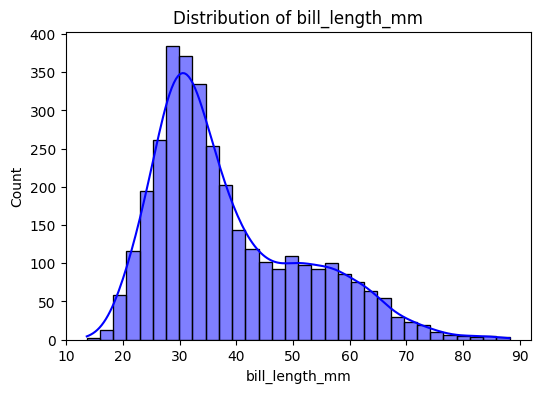

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


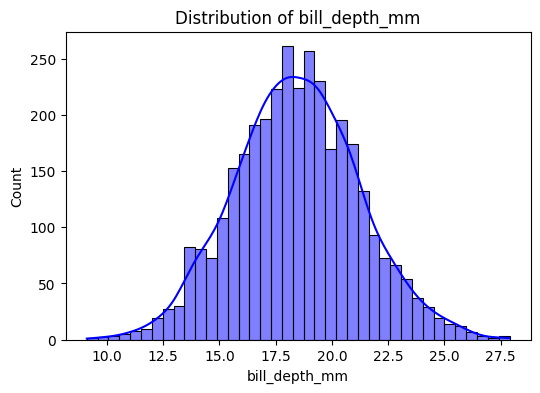

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


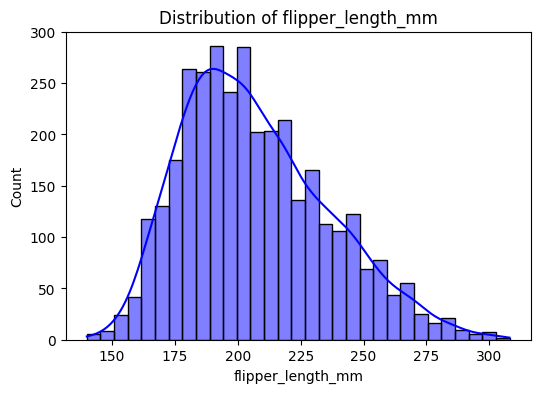

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


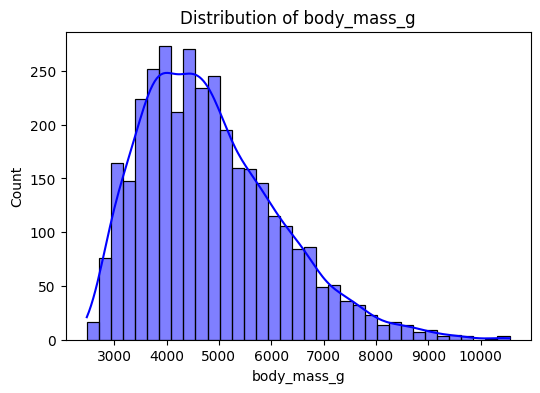

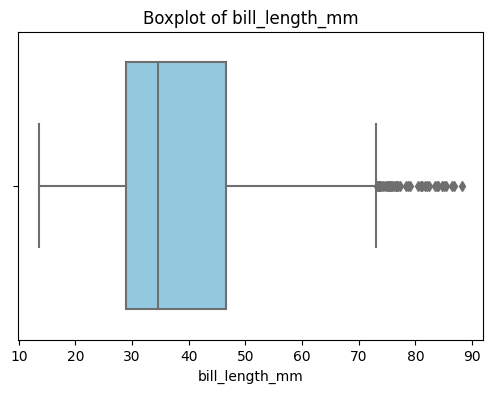

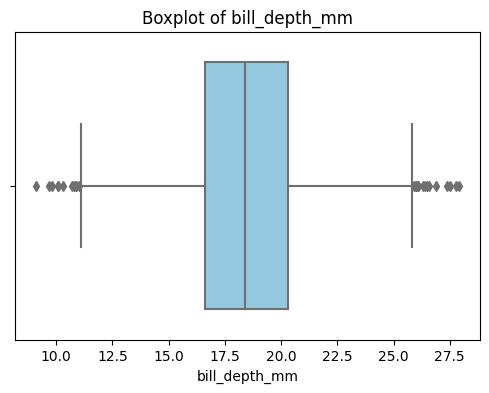

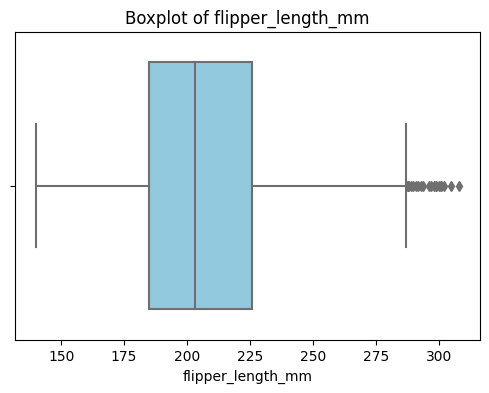

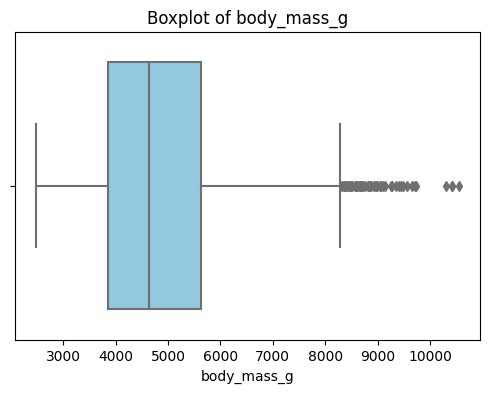

In [48]:
# Step 5: Skewness and Outlier Detection
# Plot histograms for numerical features
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, color="blue")
    plt.title(f"Distribution of {column}")
    plt.show()

# Boxplots to detect outliers
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column], color="skyblue")
    plt.title(f"Boxplot of {column}")
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


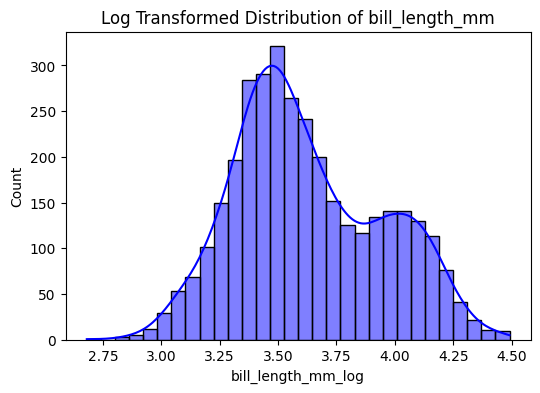

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


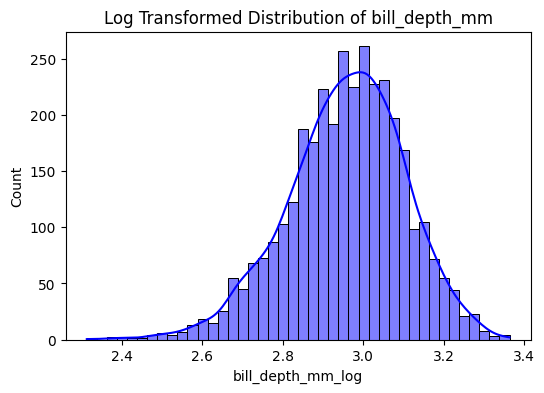

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


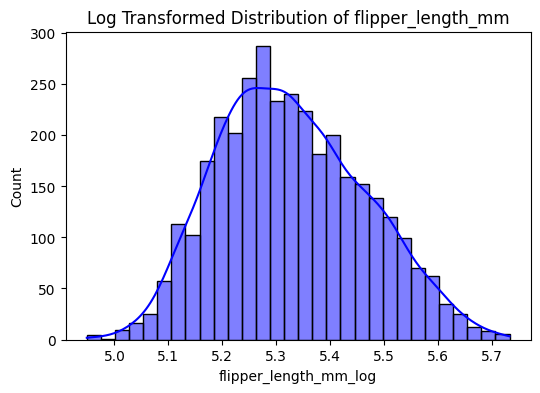

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


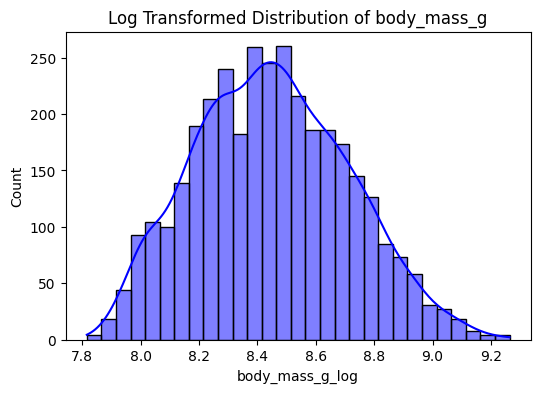

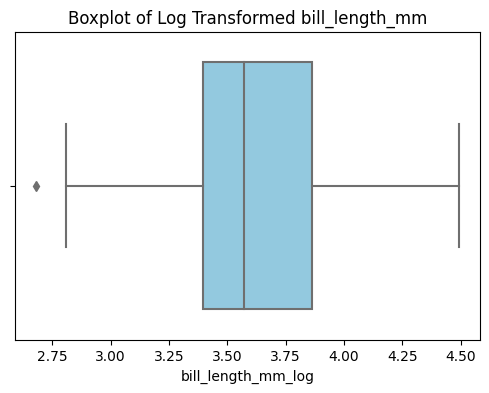

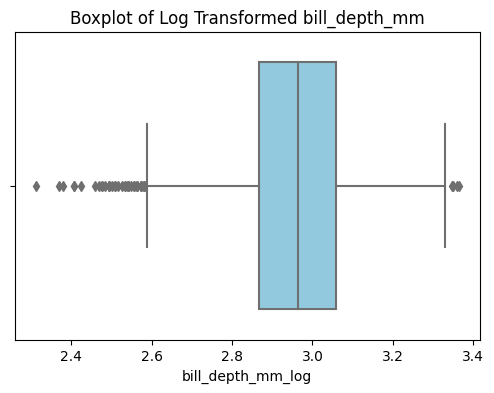

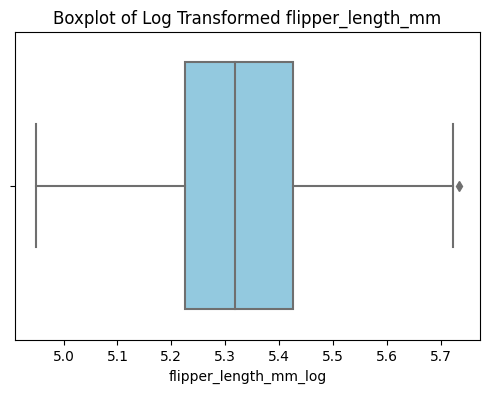

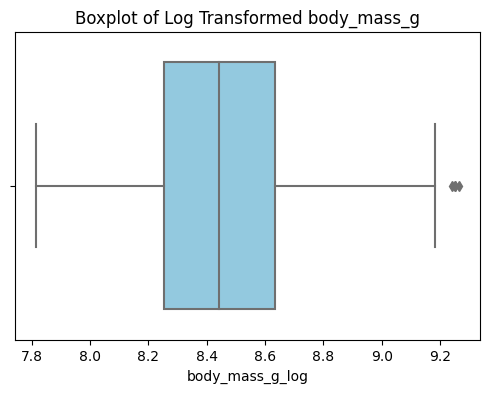

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns with outliers
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Apply log transformation (adding 1 to avoid log(0) issues)
for column in numerical_columns:
    df[column + '_log'] = np.log(df[column] + 1)

# Plot histograms for transformed data
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column + '_log'], kde=True, color="blue")
    plt.title(f"Log Transformed Distribution of {column}")
    plt.show()

# Boxplots to detect outliers in the transformed data
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column + '_log'], color="skyblue")
    plt.title(f"Boxplot of Log Transformed {column}")
    plt.show()


In [50]:
# Drop the original numerical columns
df = df.drop(columns=numerical_columns)

# Optionally, rename the log-transformed columns to match the original names
log_columns = [col + '_log' for col in numerical_columns]
df.columns = [col.replace('_log', '') if '_log' in col else col for col in df.columns]

# Display the updated DataFrame to verify
print(df.head())

   species  life_stage  health_metrics  island_Biscoe  island_Dream  \
0        0           0               1              1             0   
1        0           0               1              1             0   
2        0           0               1              1             0   
3        0           0               1              1             0   
4        0           2               1              1             0   

   island_Torgensen  sex_female  sex_male  diet_fish  diet_krill  \
0                 0           1         0          1           0   
1                 0           1         0          1           0   
2                 0           1         0          1           0   
3                 0           1         0          1           0   
4                 0           1         0          1           0   

   diet_parental  diet_squid  bill_length_mm  bill_depth_mm  \
0              0           0        3.996364       2.933857   
1              0           0        3.

In [51]:
# Step 6: Feature Scaling (Deferred to Model Building Phase)
# Scaling will be applied dynamically for train-test splits in the next phase.

In [52]:
# Step 7: Save Preprocessed Data
output_file = "preprocessed_penguins.csv"
df.to_csv(output_file, index=False)